<a href="https://colab.research.google.com/github/azheng456/LafayetteCensusData_Notebook/blob/main/Research_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

In [ ]:
data = pd.read_excel (r'data.xlsx')
indy_eth = pd.read_csv('indy_ethnicity.csv')
indy_home = pd.read_csv('indy_homeowner.csv')

Making a dashboard of all the neighborhoods in Lafayette for comparison with each other and all of Lafayette:


In [ ]:
def dashboard(Neighborhood):
  #y is neighborhood name

  #pie chart of gender distribution
  a=b=c=d=0
  hood = data[data.Neighborhood==Neighborhood]
  for x in hood['Adult Gender']:
    if x=='Male':
      a+=1
    elif x=='Female':
      b+=1
    else:
      c+=1
  
  #pie chart creation
  labels = 'Male', 'Female', 'Unknown'
  sizes = [a,b,c]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title("Gender Distribution in " + str(Neighborhood))

  plt.show()
  
  #grouped bar chart data prep
  labels = ['1','2-10','10-20','20-30','30+']
  a=b=c=d=e=m=0
  f=g=h=i=j=n=0
  hood = data[data.Neighborhood==Neighborhood]
  for x in hood['Years In Home']:
    if x==1:
      a+=1
    elif x < 10:
      b+=1
    elif x<20:
      c+=1
    elif x<30:
      d+=1
    else:
      e+=1
    m+=1
  #overall
  for x in data['Years In Home']:
    if x==1:
      f+=1
    elif x < 10:
      g+=1
    elif x<20:
      h+=1
    elif x<30:
      i+=1
    else:
      j+=1
    n+=1
  indiv = [a,b,c,d,e]
  overall = [f,g,h,i,j]
  for x in range(5):
    indiv[x] = round(indiv[x]/m*100,1)
    overall[x] = round(overall[x]/n*100,1)


  #bar chart creation
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, indiv, width, label=Neighborhood)
  rects2 = ax.bar(x + width/2, overall, width, label='Lafayette')

  ax.set_ylabel('Percent of Population')
  ax.set_title('Years in Home Comparison')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 1),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()

  plt.show()

In [ ]:
interact(dashboard, Neighborhood=['St. Lawrence Mcallister', 'Vinton', 'Monon', 
                        'Hedgewood', 'Hanna', 'Lincoln',
                        'Historic Jefferson']);                        

interactive(children=(Dropdown(description='Neighborhood', options=('St. Lawrence Mcallister', 'Vinton', 'Mono…

Comparison of Lafayette with some other areas: Tippecanoe county (where I currently reside), Hamilton county (my hometown), and all of Indiana.
Let's compare ethnicities of Asian and Hispanic populations and home ownership as these two datasets overlap in those categories.

In [ ]:
#data prep for hispanic vs asian chart
a=b=c=0
Asian_arr = ['Chinese','Japanese','Indian','Korean','Vietnamese','Myanmar (Burma)']
for x in data['Ethnicity']:
  if x in Asian_arr:
    a+=1
  if x=="Hispanic":
    b+=1
  if x!="Unknown":
    c+=1
data_asian = a/c
data_hisp = b/c

indiana = indy_eth.loc[indy_eth['Geographic Area Name'] == 'Indiana']
tipp = indy_eth.loc[indy_eth['Geographic Area Name'] == 'Tippecanoe County']
ham = indy_eth.loc[indy_eth['Geographic Area Name'] == 'Hamilton County']

a = int(indiana['Hispanic Total'].values[0].replace(',', ''))/int(indiana['Total Population'].values[0].replace(',', ''))
b = int(tipp['Hispanic Total'].values[0].replace(',', ''))/int(tipp['Total Population'].values[0].replace(',', ''))
c = int(ham['Hispanic Total'].values[0].replace(',', ''))/int(ham['Total Population'].values[0].replace(',', ''))

d = int(indiana['Asian Total'].values[0].replace(',', ''))/int(indiana['Total Population'].values[0].replace(',', ''))
e = int(tipp['Asian Total'].values[0].replace(',', ''))/int(tipp['Total Population'].values[0].replace(',', ''))
f = int(ham['Asian Total'].values[0].replace(',', ''))/int(ham['Total Population'].values[0].replace(',', ''))

#_____________

#data prep for own vs rent chart
q=y=z=0
for x in data['Home Owner']:
  if x=='Yes':
    y+=1
  else:
    z+=1
  q+=1

indiana_h = indy_home.loc[indy_home['Geographic Area Name'] == 'Indiana']
tipp_h = indy_home.loc[indy_home['Geographic Area Name'] == 'Tippecanoe County']
ham_h = indy_home.loc[indy_home['Geographic Area Name'] == 'Hamilton County']

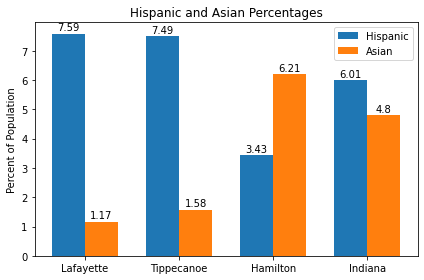

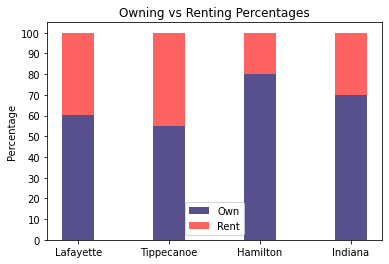

In [ ]:
labels = ['Lafayette','Tippecanoe','Hamilton','Indiana']
hisp = [data_hisp, b, c, a]
asian = [data_asian, d, e, f]
for x in range(4):
  hisp[x] = round(hisp[x]*100,2)
  asian[x] = round(asian[x]*100,2)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hisp, width, label='Hispanic')
rects2 = ax.bar(x + width/2, asian, width, label='Asian')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Population')
ax.set_title('Hispanic and Asian Percentages')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#___________

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

own = [y/q*100, tipp_h['Own Percent'].values[0], ham_h['Own Percent'].values[0], indiana_h['Own Percent'].values[0]]
rent = [z/q*100, tipp_h['Rent Percent'].values[0], ham_h['Rent Percent'].values[0], indiana_h['Rent Percent'].values[0]]
for x in range(4):
  own[x] = round(own[x],2)
  rent[x] = round(rent[x],2)

p1 = plt.bar(ind, own, width, color="#58508d")
p2 = plt.bar(ind, rent, width, color="#ff6361",
             bottom=own)

plt.ylabel('Percentage')
plt.title('Owning vs Renting Percentages')
plt.xticks(ind, ('Lafayette','Tippecanoe','Hamilton','Indiana'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Own', 'Rent'))

plt.show()

Let's also compare the same thing among major college counties: IU (Monroe), Purdue (Tippecanoe), Butler (Marion), and Ball State (Delaware)

In [ ]:
monroe_h = indy_home.loc[indy_home['Geographic Area Name'] == 'Monroe County']
tipp_h = indy_home.loc[indy_home['Geographic Area Name'] == 'Tippecanoe County']
marion_h = indy_home.loc[indy_home['Geographic Area Name'] == 'Marion County']
delaware_h = indy_home.loc[indy_home['Geographic Area Name'] == 'Delaware County']
#_____
monroe = indy_eth.loc[indy_eth['Geographic Area Name'] == 'Monroe County']
tipp = indy_eth.loc[indy_eth['Geographic Area Name'] == 'Tippecanoe County']
marion = indy_eth.loc[indy_eth['Geographic Area Name'] == 'Marion County']
delaware = indy_eth.loc[indy_eth['Geographic Area Name'] == 'Delaware County']

a = int(monroe['Hispanic Total'].values[0].replace(',', ''))/int(monroe['Total Population'].values[0].replace(',', ''))
b = int(tipp['Hispanic Total'].values[0].replace(',', ''))/int(tipp['Total Population'].values[0].replace(',', ''))
c = int(marion['Hispanic Total'].values[0].replace(',', ''))/int(marion['Total Population'].values[0].replace(',', ''))
d = int(delaware['Hispanic Total'].values[0].replace(',', ''))/int(delaware['Total Population'].values[0].replace(',', ''))

e = int(monroe['Asian Total'].values[0].replace(',', ''))/int(monroe['Total Population'].values[0].replace(',', ''))
f = int(tipp['Asian Total'].values[0].replace(',', ''))/int(tipp['Total Population'].values[0].replace(',', ''))
g = int(marion['Asian Total'].values[0].replace(',', ''))/int(marion['Total Population'].values[0].replace(',', ''))
h = int(delaware['Asian Total'].values[0].replace(',', ''))/int(delaware['Total Population'].values[0].replace(',', ''))


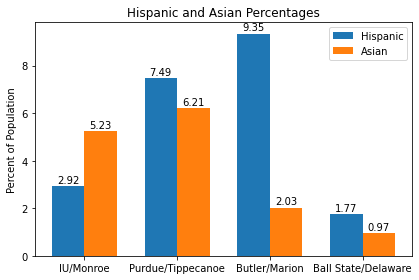

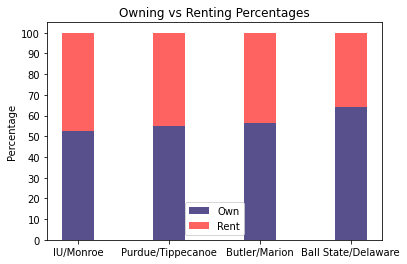

In [ ]:
labels = ['IU/Monroe','Purdue/Tippecanoe','Butler/Marion','Ball State/Delaware']
hisp = [a,b,c,d]
asian = [e,f,g,h]
for x in range(4):
  hisp[x] = round(hisp[x]*100,2)
  asian[x] = round(asian[x]*100,2)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hisp, width, label='Hispanic')
rects2 = ax.bar(x + width/2, asian, width, label='Asian')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Population')
ax.set_title('Hispanic and Asian Percentages')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#_________________

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

own = [monroe_h['Own Percent'].values[0], tipp_h['Own Percent'].values[0],
       marion_h['Own Percent'].values[0], delaware_h['Own Percent'].values[0]]
rent = [monroe_h['Rent Percent'].values[0], tipp_h['Rent Percent'].values[0],
        marion_h['Rent Percent'].values[0], delaware_h['Rent Percent'].values[0]]
for x in range(4):
  own[x] = round(own[x],2)
  rent[x] = round(rent[x],2)

p1 = plt.bar(ind, own, width, color="#58508d")
p2 = plt.bar(ind, rent, width,color="#ff6361",
             bottom=own)

plt.ylabel('Percentage')
plt.title('Owning vs Renting Percentages')
plt.xticks(ind, ('IU/Monroe','Purdue/Tippecanoe','Butler/Marion','Ball State/Delaware'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Own', 'Rent'))

plt.show()



Finally, let's make another interactive chart where we can easily see the change in ethnicity distribution between the 4 college counties.


In [ ]:
def dashboard(County):
  #y is neighborhood name

  Countyn = indy_eth.loc[indy_eth['Geographic Area Name'] == County]
  a = int(Countyn['Hispanic Total'].values[0].replace(',', ''))/int(Countyn['Total Population'].values[0].replace(',', ''))
  b = int(Countyn['Asian Total'].values[0].replace(',', ''))/int(Countyn['Total Population'].values[0].replace(',', ''))
  c = 1 - (a+b)
  #pie chart of gender distribution
  
  #pie chart creation
  labels = 'Hispanic', 'Asian', 'Else'
  sizes = [a,b,c]
  colors = ["#ff6361","#58508d","#003f5c"]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title("Ethnicity Distribution in " + str(County))

  plt.show()
  

In [ ]:
interact(dashboard, County=['Monroe County', 'Marion County',
                            'Tippecanoe County', 'Delaware County']);                        

interactive(children=(Dropdown(description='County', options=('Monroe County', 'Marion County', 'Tippecanoe Co…